# Finding the Best Markets to Advertise In


In [1]:
import pandas as pd
from numpy import std,mean
market_2017 = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", encoding = "UTF-8")
market_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
market_2017.head(10)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CodingEntrepreneurs,NaN,1.0
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
8,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,24.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0


In [3]:
for i in market_2017["JobRoleInterest"].str.contains("Web Developer|Mobile Developer").value_counts():
    print(i/len(market_2017["JobRoleInterest"])*100)
    

33.17744154057772
5.2929848693259975


Approximately 33% of the people are interested in taking courses like Mobile and Web development courses


In [4]:
for i in market_2017["JobRoleInterest"].str.contains(",").value_counts():
    print(i/len(market_2017["JobRoleInterest"])*100)


26.294360385144426
12.176066024759285


Approximately 26% of the people are interested in taking multiple courses

In [5]:
interest_customers = market_2017.dropna(subset = ["JobRoleInterest"])
print(interest_customers["CountryLive"].value_counts().head(10))
interest_customers["CountryLive"].value_counts(normalize = True).mul(100).head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64


United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

These are the 10 best countries to advertise, United States of America is the clear leader. 

Countries like India, UK and Canada are good places as well 

[86.24141876430205, 13.75858123569794]


<Container object of 2 artists>

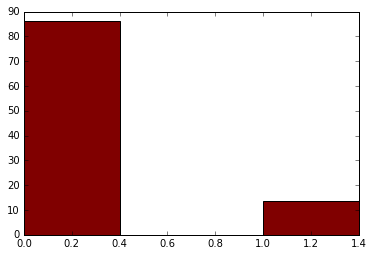

In [6]:
li=[]
for i in market_2017["JobRoleInterest"].str.contains("Web Developer|Mobile Developer").value_counts():
    li.append(i)
new_li=[]
for j in li:
    val = j*100/sum(li)
    new_li.append(val)
print(new_li)
from matplotlib import pyplot as plt
%matplotlib inline
keys = ["Web Developer|Mobile Developer","Others"]
plt.bar([0,1], new_li, color ='maroon',
        width = 0.4)

In [7]:
new_market_2017 = market_2017.dropna(subset=["JobRoleInterest"])
new_market_2017

import numpy as np 
table = pd.pivot_table(data=new_market_2017,index=['CountryLive'],aggfunc = np.sum)
table["MoneyForLearning"].sort_values(ascending = False).head(10)

CountryLive
United States of America    3747867.0
India                        365317.0
Canada                       204548.0
Australia                    170495.0
Spain                        120058.0
Bangladesh                   101647.0
United Kingdom                91405.0
Nigeria                       53296.0
Brazil                        53273.0
Russia                        48710.0
Name: MoneyForLearning, dtype: float64

American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. The above 10 countries are the highest number

In [8]:
new_market_2017[new_market_2017["MonthsProgramming"]==0]
new_market_2017.loc[new_market_2017["MonthsProgramming"] == 0, "MonthsProgramming"] = 1
new_market_2017[new_market_2017["MonthsProgramming"]==0]

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston


In [9]:
new_market_2017["Cost_PM"] = new_market_2017["MoneyForLearning"]/new_market_2017["MonthsProgramming"]
new_market_2017["Cost_PM"]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
9            5.555556
11           0.000000
13                NaN
14                NaN
15           0.000000
16          16.666667
18          35.714286
19          17.857143
21         100.000000
22         285.714286
23         100.000000
28           2.416667
29                NaN
30          66.666667
31           0.000000
32         100.000000
33          83.333333
34                NaN
35           0.000000
37                NaN
40          25.000000
41           0.000000
42          50.000000
43           0.000000
52           0.000000
             ...     
18080       25.000000
18081             NaN
18088      182.000000
18089        0.000000
18090        0.000000
18093       27.777778
18097        0.000000
18098        1.222222
18099     1000.000000
18107      275.000000
18111      200.000000
18112        0.000000
18113        0.000000
18118        0.000000
18125     

In [10]:
new_table = pd.pivot_table(new_market_2017,index=['CountryLive'],aggfunc = np.mean)
new_table["Cost_PM"].sort_values(ascending = False)

CountryLive
Yemen                       10000.000000
Puerto Rico                  4291.394558
Austria                       936.208333
Spain                         784.553084
Jamaica                       747.037037
Hong Kong                     523.341049
Trinidad & Tobago             500.000000
Australia                     419.268452
Taiwan                        417.966524
Luxembourg                    338.817664
Norway                        318.914815
New Zealand                   316.171958
Chile                         300.416667
Israel                        298.130787
Russia                        284.615280
Portugal                      277.752763
Uganda                        276.620370
Vietnam                       243.324074
Bangladesh                    239.361883
Niger                         239.303571
Nigeria                       237.303388
China                         236.441270
United States of America      227.997996
Dominican Republic            201.178266
Soma

Money invested per month by all countries, have a look at the 4 countries that we wanted to observe below


In [11]:
a = new_market_2017["CountryLive"]=="United States of America"
b = new_market_2017["CountryLive"]=="United Kingdom"
c = new_market_2017["CountryLive"]=="Canada"
d = new_market_2017["CountryLive"]=="India"
new_market_2017[a|b|c|d]
top_4 =  pd.pivot_table(new_market_2017[a|b|c|d],index=['CountryLive'],aggfunc = np.mean)
top_4["Cost_PM"].sort_values(ascending = False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: Cost_PM, dtype: float64

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

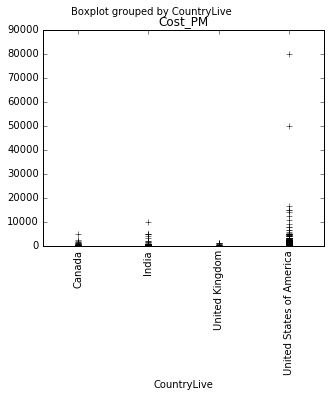

In [12]:
%matplotlib inline
new_market_2017[a|b|c|d].boxplot(by ='CountryLive', column =['Cost_PM'], grid = False)
plt.ylim(0,90000)
plt.subplots_adjust(left=0.25)
plt.xticks(rotation=90)

From th above boxplot, it is evident that Canada, India and the United Kingdom have very few outliers with respect to money spent per month. But on the other hand the United States of America has 2 outliers which are way out of range. 

In [13]:
market_no_outliers_2017 = new_market_2017[a|b|c|d][new_market_2017[a|b|c|d]["Cost_PM"]<20000]
countries_mean = pd.pivot_table(market_no_outliers_2017,index=['CountryLive'],aggfunc = np.mean)
countries_mean["Cost_PM"]

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: Cost_PM, dtype: float64

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

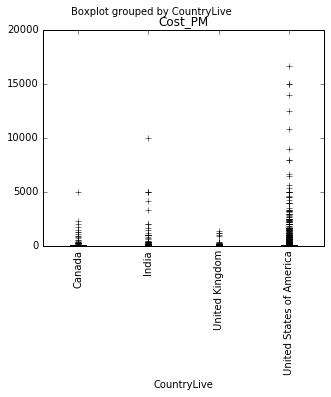

In [14]:
market_no_outliers_2017.boxplot(by ='CountryLive', column =['Cost_PM'], grid = False)
plt.ylim(0,20000)
plt.subplots_adjust(left=0.25)
plt.xticks(rotation=90)

In [15]:
india_outliers = market_no_outliers_2017[(market_no_outliers_2017["CountryLive"]=="India") & (market_no_outliers_2017["Cost_PM"]>3000)]
# print(india_outliers[["MoneyForLearning","Cost_PM","MonthsProgramming","AttendedBootcamp","BootcampFinish","BootcampLoanYesNo","BootcampName","BootcampRecommend"]])
canada_outliers = market_no_outliers_2017[(market_no_outliers_2017["CountryLive"]=="Canada") & (market_no_outliers_2017["Cost_PM"]>3000)]
# canada_outliers[["MoneyForLearning","Cost_PM","MonthsProgramming","AttendedBootcamp","BootcampFinish","BootcampLoanYesNo","BootcampName","BootcampRecommend"]]
usa_outliers = market_no_outliers_2017[(market_no_outliers_2017["CountryLive"]=="United States of America") & (market_no_outliers_2017["Cost_PM"]>10000)]
# usa_outliers[["MoneyForLearning","Cost_PM","MonthsProgramming","AttendedBootcamp","BootcampFinish","BootcampLoanYesNo","BootcampName","BootcampRecommend"]]

The above rows look like outliers, these students have spent a lots of money and have not attended bootcamps as well. I am not sure how accurate these values are, if these participants actually spent this much money on learning. 

So it is safe to assume that these rows are outliers. 
Let us drop these rows and re calculate the mean. 

From the boxplot above, it was evident india had some outliers after the United States of America, Canada and United Kingdom look good. 


In [16]:
market_no_outliers_2017 = market_no_outliers_2017.drop(index=[1728,1755,7989,8126,13398,15587,3930,6805,7198,16650,16997,17231,13659])


In [17]:
final_vals = pd.pivot_table(market_no_outliers_2017,index = "CountryLive", 
               aggfunc = np.mean)
final_vals["Cost_PM"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    155.459187
Name: Cost_PM, dtype: float64

Average subscription costs 59 dollars a month, by observing the values above other that United States of America, let us make some predictions as to which country will be a good market to advertise in. 

CountryLive
Canada                       239
India                        457
United Kingdom               279
United States of America    2925
Name: BootcampName, dtype: int64

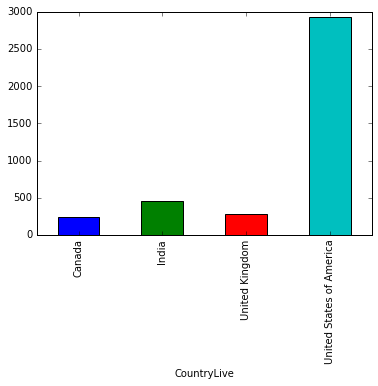

In [18]:
country_count = pd.pivot_table(market_no_outliers_2017,index = "CountryLive", 
               aggfunc = np.size)
country_count.iloc[:,4].plot(kind="bar")
country_count.iloc[:,4]

From the above graph, United States of America is clear at the top, India at 2nd is a distant 2nd.

Advertsing in UK makes no sense as average money customers are ready to spend per month is well below the subscription costs offered by the company. So investing in UK seems pointless. 

Now the choice lies between splitting marketting costs between USA, Canada and India.  So it would be logical to assume that majority the company's budget would be utilized in the United States of America. And a smaller amount of money split between India and Canada equally. 



In [19]:
# country_mean = {}
# country_sd = {}
# for i in market_no_outliers_2017["CountryLive"].unique():
#     country_set = market_no_outliers_2017[market_no_outliers_2017["CountryLive"]==i]

#     a = country_set["Cost_PM"].mean()
#     b = country_set["Cost_PM"].std(ddof = 0)
#     country_mean[i] = a
#     country_sd[i] = b
# print(country_mean,country_sd)

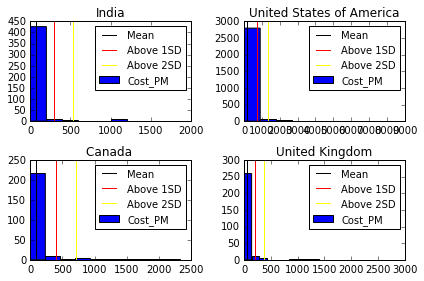

In [20]:
set_india = market_no_outliers_2017[market_no_outliers_2017["CountryLive"]=="India"]
set_usa = market_no_outliers_2017[market_no_outliers_2017["CountryLive"]=="United States of America"]
set_canada = market_no_outliers_2017[market_no_outliers_2017["CountryLive"]=="Canada"]
set_uk = market_no_outliers_2017[market_no_outliers_2017["CountryLive"]=="United Kingdom"]
# set_india["Cost_PM"].plot.hist()
# plt.axvline(set_india["Cost_PM"].mean(), color = 'Black', label = 'Mean')
# plt.axvline(set_india["Cost_PM"].std(ddof = 0)+set_india["Cost_PM"].mean(), color="Red", label="Above 1SD")
# plt.axvline(2*set_india["Cost_PM"].std(ddof = 0)+set_india["Cost_PM"].mean(), color="Yellow", label="Below 2SD")
# plt.legend()



n_bins = 10


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)


ax0.hist(set_india["Cost_PM"], n_bins, histtype='bar')
ax0.set_title('India')
plt.xlim(set_india["Cost_PM"].min(),3000)
plt.ylim(0,400)
ax0.axvline(set_india["Cost_PM"].mean(), color = 'Black', label = 'Mean')
ax0.axvline(set_india["Cost_PM"].std(ddof = 0)+set_india["Cost_PM"].mean(), color="Red", label="Above 1SD")
ax0.axvline(2*set_india["Cost_PM"].std(ddof = 0)+set_india["Cost_PM"].mean(), color="Yellow", label="Above 2SD")
ax0.legend( prop={"size":10})

ax1.hist(set_usa["Cost_PM"], n_bins, histtype='bar')
ax1.set_title('United States of America')
plt.xlim(set_usa["Cost_PM"].min(),5000)
ax1.axvline(set_usa["Cost_PM"].mean(), color = 'Black', label = 'Mean')
ax1.axvline(set_usa["Cost_PM"].std(ddof = 0)+set_usa["Cost_PM"].mean(), color="Red", label="Above 1SD")
ax1.axvline(2*set_usa["Cost_PM"].std(ddof = 0)+set_usa["Cost_PM"].mean(), color="Yellow", label="Above 2SD")
ax1.legend( prop={"size":10})

ax2.hist(set_canada["Cost_PM"], n_bins, histtype='bar')
ax2.set_title('Canada ')
plt.xlim(set_canada["Cost_PM"].min(),3000)
plt.ylim(0,250)
ax2.axvline(set_canada["Cost_PM"].mean(), color = 'Black', label = 'Mean')
ax2.axvline(set_canada["Cost_PM"].std(ddof = 0)+set_canada["Cost_PM"].mean(), color="Red", label="Above 1SD")
ax2.axvline(2*set_canada["Cost_PM"].std(ddof = 0)+set_canada["Cost_PM"].mean(), color="Yellow", label="Above 2SD")
ax2.legend( prop={"size":10})


ax3.hist(set_uk["Cost_PM"], n_bins, histtype='bar')
ax3.set_title('United Kingdom')
plt.xlim(set_uk["Cost_PM"].min(),3000)
plt.ylim(0,300)
ax3.axvline(set_uk["Cost_PM"].mean(), color = 'Black', label = 'Mean')
ax3.axvline(set_uk["Cost_PM"].std(ddof = 0)+set_uk["Cost_PM"].mean(), color="Red", label="Above 1SD")
ax3.axvline(2*set_uk["Cost_PM"].std(ddof = 0)+set_uk["Cost_PM"].mean(), color="Yellow", label="Above 2SD")
ax3.legend( prop={"size":10})


fig.tight_layout()
plt.show()

The above plot of the 4 countries is of the 
1. mean
2. mean + standard deviation 
3. mean + 2 * standard deviation

Plotting the values below the mean make no sense as the number of participants cannot be negative.

From the graphs it is very evident that most of the values fall between (1) and (2) and a few inbetween (2) and (3).

We have a few more outliers but these aren't that extreme

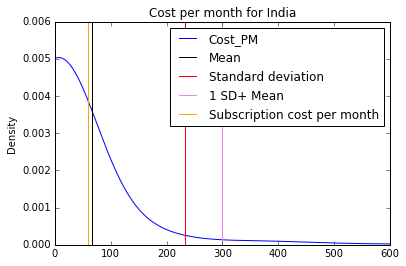

In [31]:
set_india["Cost_PM"].plot.kde(xlim=(set_india["Cost_PM"].min(),600))
plt.axvline(set_india["Cost_PM"].mean(), label="Mean",color="Black")
plt.axvline(set_india['Cost_PM'].std(ddof = 0),color="Red", label="Standard deviation")
plt.axvline(set_india["Cost_PM"].mean()+set_india['Cost_PM'].std(ddof = 0),color="Violet", label="1 SD+ Mean")
plt.axvline(59, label="Subscription cost per month",color="Orange")
plt.legend()
plt.title("Cost per month for India")

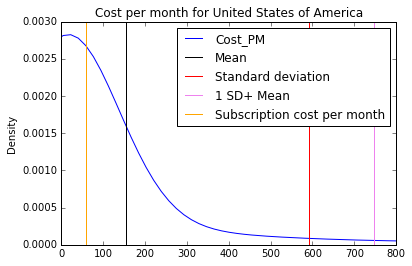

In [32]:
set_usa["Cost_PM"].plot.kde(xlim=(set_usa["Cost_PM"].min(),800))
plt.axvline(set_usa["Cost_PM"].mean(), label="Mean",color="Black")
plt.axvline(set_usa['Cost_PM'].std(ddof = 0),color="Red", label="Standard deviation")
plt.axvline(set_usa["Cost_PM"].mean()+set_usa['Cost_PM'].std(ddof = 0),color="Violet", label="1 SD+ Mean")
plt.axvline(59, label="Subscription cost per month",color="Orange")
plt.legend()
plt.title("Cost per month for United States of America")

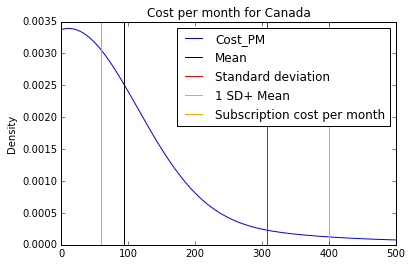

In [33]:
set_canada["Cost_PM"].plot.kde(xlim=(set_canada["Cost_PM"].min(),500))
plt.axvline(set_canada["Cost_PM"].mean(), label="Mean",color="Black")
plt.axvline(set_canada['Cost_PM'].std(ddof = 0),color="Red", label="Standard deviation")
plt.axvline(set_canada["Cost_PM"].mean()+set_canada['Cost_PM'].std(ddof = 0),color="Violet", label="1 SD+ Mean")
plt.axvline(59, label="Subscription cost per month",color="Orange")
plt.legend()
plt.title("Cost per month for Canada")

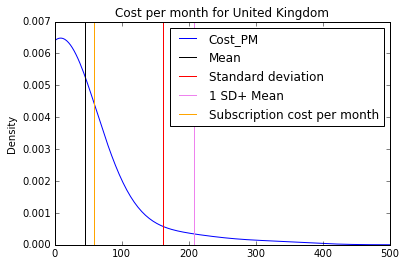

In [35]:
set_uk["Cost_PM"].plot.kde(xlim=(set_uk["Cost_PM"].min(),500))
plt.axvline(set_uk["Cost_PM"].mean(), label="Mean",color="Black")
plt.axvline(set_uk['Cost_PM'].std(ddof = 0),color="Red", label="Standard deviation")
plt.axvline(set_uk["Cost_PM"].mean()+set_uk['Cost_PM'].std(ddof = 0),color="Violet", label="1 SD+ Mean")
plt.axvline(59, label="Subscription cost per month",color="Orange")
plt.legend()
plt.title("Cost per month for United Kingdom")

In [37]:
final_vals["Age"]


CountryLive
Canada                      26.936975
India                       21.433628
United Kingdom              28.620939
United States of America    29.360525
Name: Age, dtype: float64

The density plots for the 4 countries confirm that most of partcipants in the survey falls inbetween the z-scores of 0 and 1. 
**The yellow line(subscription cost) on the graphs should ideally be to the right of the black line(mean)**

*USA, Canada and India this is the case, thus proving that these 3 countries are good to invest in, meanwhile UK is not really a good option to invest in *
- 33% of all the people who took the survey are interested in Mobile or web development, and 88% were interested in these courses within this list exclduing the people who selected NaN.
- The company must invest the majority of its funds in USA 
- The company can invest equal and smaller proportions of funds in both India and Canada.
- Observing the Age column, India has an average age of 21, while Canada has an average age of 26, so in the long term investing in youth seems like a better option.
- From common knowledge considering the population and age I would probably suggest India, but would request help of the marketting team to invest some time to take a more informed decision. 
